# Statsmodels and Time Series Data Decomposition


## Introduction to Statsmodels module
Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

## Time Series Analysis tsa
statsmodels.tsa contains model classes and functions that are useful for time series analysis.
* Basic models:
    * univariate autoregressive models (AR)
    * vector autoregressive models (VAR) 
    * univariate autoregressive moving average models (ARMA)
* Non-linear models:
    * Markov switching dynamic regression 
    * Autoregression
* descriptive statistics for time series
    * autocorrelation
    * partial autocorrelation function and periodogram
    * theoretical properties of ARMA or related processes.
* methods to work with autoregressive and moving average lag-polynomials
* related statistical tests and some useful helper functions are available
* [Documentation](https://www.statsmodels.org/stable/tsa.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Example of GPC data set

In [2]:
df = pd.read_csv('Dataset\macrodata.csv', index_col=0, parse_dates= True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [3]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

[Text(0, 0.5, 'REAL GDP'), Text(0.5, 0, 'Year')]

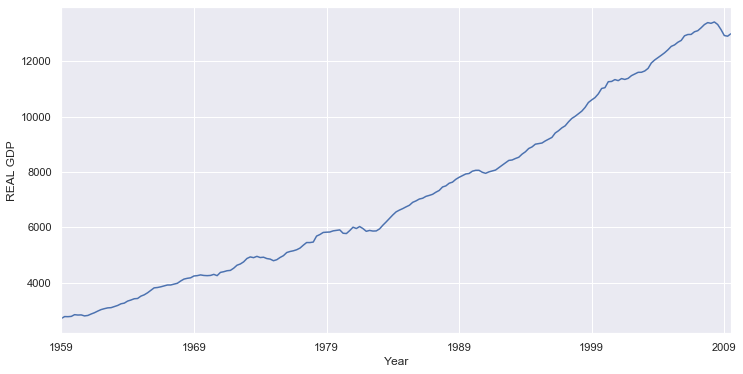

In [7]:
ax = df['realgdp'].plot(figsize = (12,6))
ax.set(xlabel = 'Year', ylabel = 'REAL GDP')

## Statsmodels to decompose the time series data into trend and cyclical

In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gpd_cycle, gpd_trend = hpfilter(df['realgdp'], lamb=1600) # Quarterly data

In [11]:
gpd_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [12]:
gpd_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

In [13]:
df['cycle'] = gpd_cycle
df['trend'] = gpd_trend

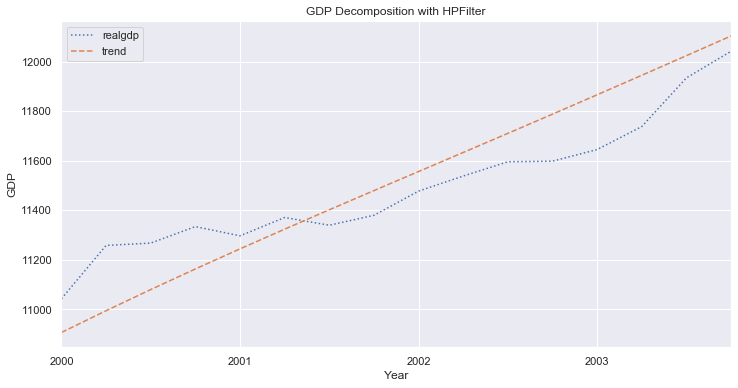

In [20]:
ax = df[['realgdp','trend']]['2000-01-01':'2004-01-01'].plot(figsize=(12,6), style=[':','--'])
ax.set(xlabel ='Year',ylabel='GDP',title='GDP Decomposition with HPFilter')
ax.autoscale(axis='x',tight=True)

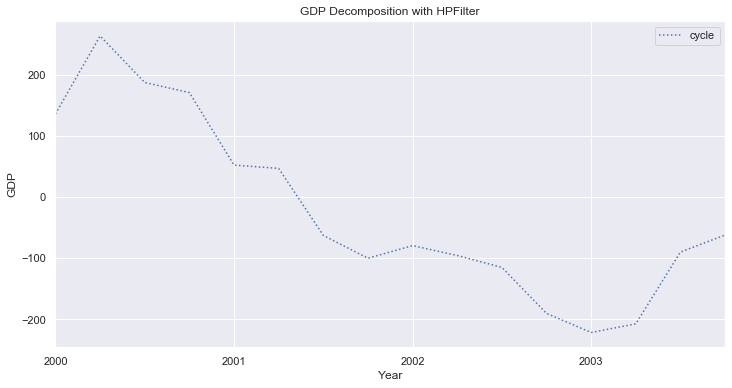

In [21]:
ax = df[['cycle']]['2000-01-01':'2004-01-01'].plot(figsize=(12,6), style=[':','--'])
ax.set(xlabel ='Year',ylabel='GDP',title='GDP Decomposition with HPFilter')
ax.autoscale(axis='x',tight=True)